12.666666666666664


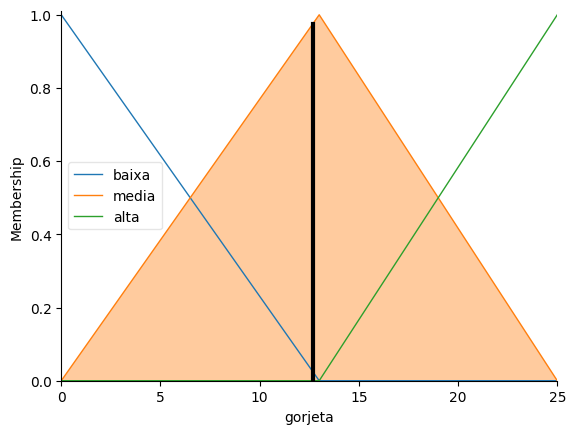

In [32]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions

# Objetos antecedentes e consequentes possuem as variáveis do universo e as suas funções de pertencimento.
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade') # 0 - 10
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico') # 0 - 10
gorjeta = ctrl.Consequent(np.arange(0, 26, 1), 'gorjeta') # 0 - 25

qualidade.automf(3, names=['baixo', 'medio', 'alto'])
servico.automf(3, names=['baixo', 'medio', 'alto'])

# Funções de pertencimento.
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 13])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [0, 13, 25])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [13, 25, 25])

# Regras
regra1 = ctrl.Rule(qualidade['baixo'] | servico['baixo'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['medio'], gorjeta['media'])
regra3 = ctrl.Rule(servico['alto'] | qualidade['alto'], gorjeta['alta'])

gorjeta_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])

valor_gorjeta = ctrl.ControlSystemSimulation(gorjeta_ctrl) # O nosso controlador aplicado a uma situação específica.
valor_gorjeta = ctrl.ControlSystemSimulation(gorjeta_ctrl) # O nosso controlador aplicado a uma situação específica.

# Passa os inputs para o ControlSystem utilizando os rótulos dos antecedentes.
valor_gorjeta.input['qualidade'] = 5
valor_gorjeta.input['servico'] = 5

valor_gorjeta.compute()

print(valor_gorjeta.output['gorjeta'])
gorjeta.view(sim=valor_gorjeta)
